# Step 8b

In [3]:
#import libraries
import random
import matplotlib.pyplot as plt
from statistics import mean 

### Preparation of Variables and Data

In [4]:
#number of people
N = 1000

# number of rounds
T = 100

#rate of contact
alpha = .04
    
#rate of infection
beta = .01
    
#list of infected individuals
infected_list = [False] * N

#list of immune individuals
immune_list = [False] * N

#list used to count how long individuals were sick or immune
immunity_check = [0] * N
    
#starting individual who is sick
infected_list[0] = True

#number of infected and sick when starting
sick = 1
healthy = 999
immune = 0
    
#array to hold sick, healthy, immune individual counts after each round
infected_data = [] * T
healthy_data = [] * T
immune_data = [] * T

#list to hold the average values of new infected for each round
mean_infected = []

### Method to make Calculations

In [5]:
#loop to iterate through every round
for i in range(0, T):
    
    #varialbe to store all the infected individuals at the begining of the round
    infectedIndex = []
    
    #loop to iterate through every location on the infected array
    for j in range(len(infected_list)):
        if(infected_list[j] == True):
            infectedIndex.append(j)
    
    #obatin the chance of being infected
    infect_chance = (beta * alpha)        
            
    #loop through infected people    
    for k in infectedIndex:
        
        #variable to hold the new infections
        newCount = 0
        
        #loop through all people infected person could have been in contact with
        for l in range(len(infected_list)):
            
            #obtain a random number
            prob = random.random()
        
            #condition to see if location is infected and if its probability satisfies to infect others
            if((infected_list[l] == False) and (prob < infect_chance)):
                
                #if location is not immune then proceed
                if (immune_list[l] == False):
                
                    #make location on infected array true as in infected
                    infected_list[l] = True
                
                    #increase infected count
                    sick += 1
                
                    #decrease healthy count
                    healthy -= 1
                    
                    #increase count of new infected
                    newCount += 1
                    
         #append the number of new infected by individual
        mean_infected.append(newCount)
    #loop to iterate through infected list
    for x in range(len(infected_list)):
            
            #condition to check if the infected individual reached immunity
            if(immunity_check[x] == 5):
                
                #make individual immune locatin on immune_list true
                immune_list[x] = True
                
                #make individual non-infected on infected_list
                infected_list[x] = False
                
                #increase the number of rounds on immunity_check
                immunity_check[x] += 1
                
                #increase immune count
                immune += 1
                
                #decrease sick count
                sick -= 1
                
                #increase healthy count
                healthy += 1
                
            #condition if inmmunity_check is greater 5    
            elif(immunity_check[x] > 5):
                
                #condition to check if immunity reached 20 rounds of immunity
                if(immunity_check[x] == 25):
                    
                    #make immune location false on the immune_list
                    immune_list[x] = False
                    
                    #reset immunity_check location
                    immunity_check[x] = 0
                    
                    #decrease number of immune by 1
                    immune -= 1
                    
                #else condition if immune did not reach 20 rounds
                else:
                    
                    #increase immunity_count location
                    immunity_check[x] += 1
                    
            #condition to check for all locations that are infected        
            elif(infected_list[x] == True):
                
                #increase number of infected rounds
                immunity_check[x] += 1
    
    #add number of infected to dataset
    infected_data.append(sick)
    
    #add number of healthy to dataset
    healthy_data.append(healthy)
    
    #add number of immune to dataset
    immune_data.append(immune)
    
    #print round number, infected count, healthy count, and immune count
    print("Round:", i + 1)
    print("Infected:", sick)
    print("Healthy:", healthy)
    print("Immune:", immune)
    print()
                   

Round: 1
Infected: 1
Healthy: 999
Immune: 0

Round: 2
Infected: 1
Healthy: 999
Immune: 0

Round: 3
Infected: 2
Healthy: 998
Immune: 0

Round: 4
Infected: 4
Healthy: 996
Immune: 0

Round: 5
Infected: 5
Healthy: 995
Immune: 0

Round: 6
Infected: 5
Healthy: 995
Immune: 1

Round: 7
Infected: 5
Healthy: 995
Immune: 1

Round: 8
Infected: 5
Healthy: 995
Immune: 2

Round: 9
Infected: 6
Healthy: 994
Immune: 4

Round: 10
Infected: 7
Healthy: 993
Immune: 5

Round: 11
Infected: 8
Healthy: 992
Immune: 6

Round: 12
Infected: 11
Healthy: 989
Immune: 6

Round: 13
Infected: 13
Healthy: 987
Immune: 7

Round: 14
Infected: 12
Healthy: 988
Immune: 10

Round: 15
Infected: 15
Healthy: 985
Immune: 12

Round: 16
Infected: 19
Healthy: 981
Immune: 14

Round: 17
Infected: 23
Healthy: 977
Immune: 17

Round: 18
Infected: 33
Healthy: 967
Immune: 20

Round: 19
Infected: 38
Healthy: 962
Immune: 22

Round: 20
Infected: 47
Healthy: 953
Immune: 27

Round: 21
Infected: 62
Healthy: 938
Immune: 33

Round: 22
Infected: 68
He

### Sick Count Data

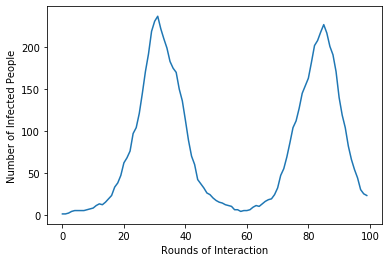

In [6]:
#name x axis on plot
plt.xlabel("Rounds of Interaction")

#name y axis on plot
plt.ylabel("Number of Infected People")

#make a plot of infected data
plt.plot(infected_data)

#display plot of infected data
plt.show()

### Healthy Count Data

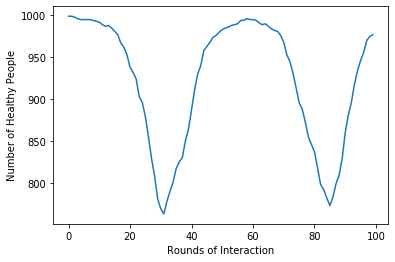

In [7]:
#name x axis on plot
plt.xlabel("Rounds of Interaction")

#name y axis on plot
plt.ylabel("Number of Healthy People")

#make a plot of healthy data
plt.plot(healthy_data)

#display plot of healthy data
plt.show()

### Immune Count Data

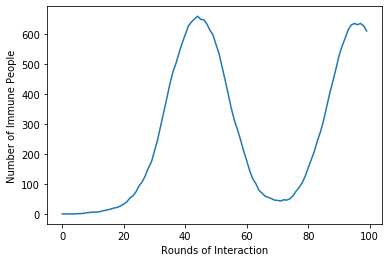

In [8]:
#name x axis on plot
plt.xlabel("Rounds of Interaction")

#name y axis on plot
plt.ylabel("Number of Immune People")

#make a plot of the immune data
plt.plot(immune_data)

#display plot of immune data
plt.show()

### Calculate Ro

In [9]:
#calculate and print Ro
print("Average New Infected Per Individual:", mean(mean_infected))

Average New Infected Per Individual: 0.20147134744450182
